# Project 8: Machine Learning for Predictive Analytics

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# variable assignment for bold letters within assignment.
a = '\033[1m'
b = '\033[0m'

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df=pd.read_csv("F:\AINE.AI\Project 8\Telecom Data - Machine Learning\Telecom Data.csv")

## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape

(51047, 58)

In [4]:
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [5]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [6]:
# checking for duplicate information

cust_df['CustomerID'].nunique()/cust_df.shape[0]

1.0

In [7]:
# % churn customers

round(cust_df ['Churn'].value_counts()/cust_df.shape[0]*100,2)

No     71.18
Yes    28.82
Name: Churn, dtype: float64

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [8]:
#How many customers had zero monthly revenue?

len(cust_df.loc[cust_df['MonthlyRevenue']== 0].index)


6

In [9]:
y = list(cust_df.loc[cust_df['MonthlyRevenue'] == 0].index)
y

[12262, 13127, 42051, 49920, 49946, 51035]

In [10]:
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis

cust_df.drop(index = y, inplace=True)

In [11]:
# checking is there any record left out?

cust_df.loc[cust_df['MonthlyRevenue']== 0]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus


### Q1.2 How many columns has missing values percentage > 5%

In [12]:
#Calculate for each column % of missing value in the data

(cust_df.isnull().sum()/cust_df.shape[0])*100

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.305637
MonthlyMinutes               0.305637
TotalRecurringCharge         0.305637
DirectorAssistedCalls        0.305637
OverageMinutes               0.305637
RoamingCalls                 0.305637
PercChangeMinutes            0.715111
PercChangeRevenues           0.715111
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

In [13]:
#How many columns has missing values percentage > 5%
temp = cust_df.isnull().sum()/cust_df.shape[0]*100
temp.loc[temp.values > 5]

Series([], dtype: float64)

<mark>__Result:__

__What strategy should be used for imputation?__

_The % values are very small. There are no columns having missing data more than 5%._

_In such case i can eleminate the empty rows._

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

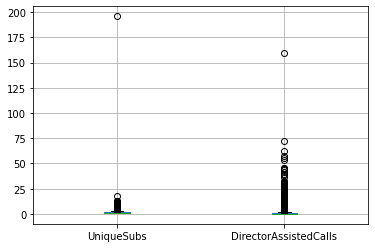

In [14]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [15]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers

q_value = [i/100 for i in range(95,101,1)]

cust_df[["UniqueSubs","DirectorAssistedCalls"]].quantile(q_value)

,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.69
0.98,4.0,6.93
0.99,5.0,9.65
1.00,196.0,159.39


In [16]:
q = cust_df[["UniqueSubs","DirectorAssistedCalls"]].quantile(0.99)

In [17]:
cust_df.shape

(51041, 58)

In [18]:
# Filtering data with 99% value

cust_df = cust_df[(cust_df["UniqueSubs"] < q.values[0]) & (cust_df["DirectorAssistedCalls"] < q.values[1])]

In [19]:
cust_df.shape

(49725, 58)

<AxesSubplot:>

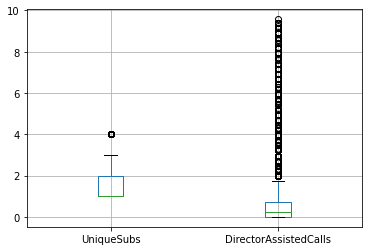

In [20]:
# boxplot after remocing the outliers
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

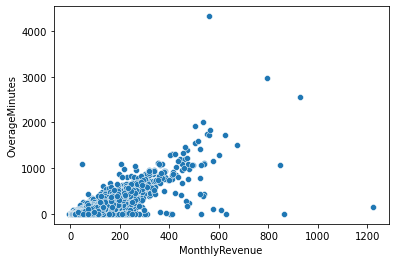

In [21]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

<mark>__Result:__
    
_From scatter plot it is clear that customers with high overage minutes also have high revenue._

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

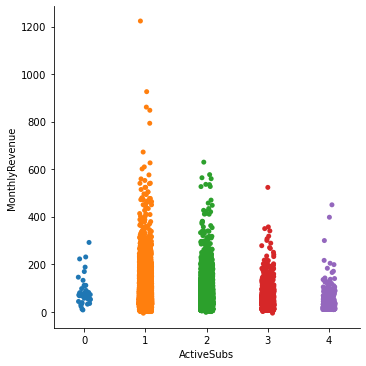

In [22]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(data = cust_df , x = 'ActiveSubs', y = 'MonthlyRevenue') 

<mark>__Result:__
    
From above plot it is clear that high number of active subscribers lead to low monthly revenue.

### Q2.3 Does credit rating have an impact in churn rate?

In [23]:
# Row Relation
print('Row wise relationship')
pd.crosstab(cust_df['Churn'],cust_df['CreditRating']).apply(lambda r : r/r.sum(), axis = 0)

# column Relation
print('Column wise relationship')
pd.crosstab(cust_df['Churn'],cust_df['CreditRating']).apply(lambda r : r/r.sum(), axis = 1)

Row wise relationship


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.691162,0.698939,0.689765,0.739916,0.7808,0.72988,0.711538
Yes,0.308838,0.301061,0.310235,0.260084,0.2192,0.27012,0.288462


Column wise relationship


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.158576,0.368409,0.159677,0.109831,0.139428,0.022282,0.041797
Yes,0.175258,0.392498,0.177633,0.095488,0.096815,0.020397,0.041911


<mark>__Result:__
    
There is not much impact of credit rating on churning of customers.
    
Though the proportion of churned customers are more towards higher credit score side.

### Placeholder for additional exploratory analysis

In [24]:
cust_df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,4.972500e+04,49725.000000,49725.000000,49725.000000,49725.000000,49725.000000,49725.000000,49518.000000,49518.000000,49725.000000,...,49724.000000,49724.000000,49724.000000,48871.000000,48871.000000,49725.000000,49725.000000,49725.000000,49725.000000,49725.000000
mean,3.201681e+06,57.769113,513.955998,46.413695,0.747150,38.336350,1.191652,-10.842704,-1.163183,5.890347,...,1.785838,1.546215,381.738135,31.347241,21.146304,0.036963,0.018100,0.052469,4.322695,0.053313
std,1.165514e+05,42.218495,509.675461,22.978788,1.381516,91.647206,9.179902,251.547729,38.144245,8.809650,...,1.296053,0.887230,253.132757,22.092045,23.930431,0.205803,0.141935,0.309728,3.131404,0.381941
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3406.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100766e+06,33.520000,157.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-6.900000,0.700000,...,1.000000,1.000000,206.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201286e+06,47.930000,362.000000,45.000000,0.250000,2.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,331.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.304650e+06,69.980000,708.000000,60.000000,0.740000,40.000000,0.200000,65.000000,1.600000,7.300000,...,2.000000,2.000000,517.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399974e+06,1223.380000,6336.000000,360.000000,9.570000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,11.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [25]:
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [26]:
#categorical features
categorical_col = cust_df.select_dtypes(include =[np.object])
print("Categorical Features in Data Set:",categorical_col.shape[1])

#numerical features
numerical_col= cust_df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Data Set:",numerical_col.shape[1])

Categorical Features in Data Set: 23
Numerical Features in Data Set: 35


In [27]:
def check_categorical(cust_df):
    colnames = cust_df.columns
    categorical_col = []
    contineous_col = []
    
    for i in colnames:
        if cust_df[i].nunique()<20 :
            if i != 'Churn':
                categorical_col.append(i)
            else :
                if i not in ['CustomerID','ServiceArea']:
                    contineous_col.append(i)
    return(categorical_col,numerical_col)

In [28]:
def check_categorial_imp(cust_df,categorial_col):
    new_categorical_col = []
    for i in categorical_col:
        if stats.chi2_contingency(pd.crosstab(cust_df['Churn'] , cust_df[i]))[1]> 0.05 :
            pass
        else:
            new_categorical_col.append(i)
            
    return new_categorical_Col

In [29]:
categorical_col , contineous_col = check_categorical(cust_df)

In [30]:
cust_df.shape

(49725, 58)

In [31]:
cust_df['Churn'].value_counts()

No     35409
Yes    14316
Name: Churn, dtype: int64

In [32]:
cust_df['Churn'].replace({'Yes' : 1 , 'No': 0}, inplace = True)

In [33]:
cust_df['Churn'].value_counts()

0    35409
1    14316
Name: Churn, dtype: int64

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [34]:
#Define columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)
X = cust_df.drop('Churn' , axis = 1)
y = cust_df['Churn']

In [35]:
col = X.columns[X.isnull().sum() != 0]
X.drop(col , axis = 1 , inplace = True)

In [36]:
obj_col = X.columns[X.dtypes == 'O']
num_col = X.columns[X.dtypes != 'O']

In [37]:
#Create dummy variables for all categorical variables
#X = pd.get_dummies(X)
X = pd.get_dummies(X , columns = obj_col, drop_first = True)

In [38]:
X.shape

(49725, 77)

In [39]:
#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [40]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [43]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [44]:
#-------------------------------- Model testing ---------------------------------#
lr.score(X_test, y_test)
#type your code here to predict for X_test data set using the fitted model
y_pred = lr.predict(X_test)

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(a+ 'Classification report of Model :\n' +b , classification_report(y_pred , y_test))
print(a + 'Confusion matrix of Model :\n' +b , confusion_matrix(y_pred , y_test))

0.7142378334897439

Classification report of Model :
               precision    recall  f1-score   support

           0       0.99      0.72      0.83     14731
           1       0.02      0.49      0.04       187

    accuracy                           0.71     14918
   macro avg       0.51      0.60      0.44     14918
weighted avg       0.98      0.71      0.82     14918

Confusion matrix of Model :
 [[10563  4168]
 [   95    92]]


In [45]:
# converting into dataframe
X_train_rfe = pd.DataFrame(X_train, columns = X.columns)
X_test_rfe = pd.DataFrame(X_test , columns = X.columns)

##### What is the precision, recall, accuracy of your model?

In [46]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [47]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('f1 - Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.492
Recall: 0.022
Accuracy: 0.714
f1 - Score: 0.041


### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [48]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [50]:
y_pred_rf = rfc.predict(X_test)

In [51]:
print(a+'Model score before RFE:' + b , rfc.score(X_test , y_test))

Model score before RFE: 0.7156455288912723


In [ ]:
print(a+'Classification report :\n\n'+b, classification_report(y_test, y_pred_rf))

In [ ]:
print(a+'Confusion matrix :\n\n'+b, confusion_matrix(y_test,y_pred_rf))

In [ ]:
X_train = pd.DataFrame(X_train , columns = X.columns)
X_test = pd.DataFrame(X_test , columns = X.columns)

#### Estimate the model performance using k fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean

# evaluate model
scores = cross_val_score(rfc, X, y, scoring='accuracy', cv=20, n_jobs=-1)
# report performance
print('Accuracy: %.3f' % mean(scores))

Comparing the performance of the Random Forest and the logistic model –
- Evaluate both models on the test set

In [56]:
print(a+'Score for linear Model score RFE \n' +b)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('f1 - Score: %.3f\n\n\n' % f1_score(y_test, y_pred))

print(a+'Score for randon forest Model score after RFE \n' +b)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_rf))
print('Precision: %.3f' % precision_score(y_test, y_pred_rf))
print('Recall: %.3f' % recall_score(y_test, y_pred_rf))
print('f1 - Score: %.3f' % f1_score(y_test, y_pred_rf))

Score for linear Model score RFE 

Accuracy: 0.714
Precision: 0.492
Recall: 0.022
f1 - Score: 0.041



Score for randon forest Model score after RFE 

Accuracy: 0.716
Precision: 0.950
Recall: 0.004
f1 - Score: 0.009


**Which metric did you choose and why?**

Both models have better accuracy of 72%.
Precision of model is quite important to choosing customer in such case.

**Which model has better performance on the test set?**

Random forest

### Q4.3 Identify most important features impacting churn

In [ ]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

from sklearn.feature_selection import RFE
rfe = RFE(lr, 20)
rfe.fit(X_train,y_train)
X_train=pd.DataFrame(X_train, columns = X.columns)
print(a +'\nfeature column from linear model:\n' + b, list(X_train.columns[rfe.support_]), '\n')


rfe_rf = RFE(rfc, 20)
rfe_rf.fit(X_train,y_train)
X_train=pd.DataFrame(X_train, columns = X.columns)
print(a +'feature column from Random forest model:\n' + b, list(X_train.columns[rfe_rf.support_]))

RFE(estimator=LogisticRegression(), n_features_to_select=20)


feature column from linear model:
 ['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes', 'DroppedCalls', 'BlockedCalls', 'DroppedBlockedCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'HandsetRefurbished_Yes', 'HandsetWebCapable_Yes', 'RespondsToMailOffers_Yes', 'HandsetPrice_240', 'HandsetPrice_500', 'HandsetPrice_Unknown', 'MadeCallToRetentionTeam_Yes', 'CreditRating_5-Low', 'MaritalStatus_Unknown'] 

